# Cover

**Title:** NN Project

**Subject:** Collective Intelligence

**Professors:** Sylvain Cussat-Blanc

**Writers:** 

*   Fitzgibbon, Declan - 21912679
*   Quintero, Reynaldo - 21912040
*   Yang, Wenhan - 21911370

**Location:** 
31200 Toulouse, France. Université Toulouse I Capitole. 

**Year of creation**: 2020.

# Abstract

The purpose of this project was to ... . The dataset studied contained ... . The machine learning techniques applied were: ... . After preprocessing the data and tuning the models to obtain the best results for the available data, the most accurate algorithm was .... 

# Sections



*   [Introduction](#scrollTo=...)

# Introduction


The purpose of this project was to ... . 

The dataset studied contained ... .

Specifically, the dataset provided information of different patient features that allowed ....

## General objective:

Define ... .

## Specific objectives:

*   Perform a detailed analysis on the dataset.
*   Perform data preprocessing techniques to increase data quality.
*  ...

## Scope
The scope of this project is confined to the provided dataset, as it is the only information that was available. This means that the dataset will be used both for training and for testing.

Due to time constraint, only some techniques of data preprocessing will be used, as well as only some parameters will be changed to train the best model possible.

# First approach to the dataset

The first step taken to start this project was the visualization of the given dataset.

Said dataset was given in a csv format and consisted in:

>1.   **ID:** ID of the subject. (Integer number)
>2.   **Sex** (Integer number: 1 or 2)
>3.   **Age** (Float number representing the years, months and dates)
>4.   **I1:** URL of the tooth I1 (String).
>5.   **I2:** URL of the tooth I2 (String).
>6.   **C:** URL of the tooth C (String).
>7.   **PM1:** URL of the tooth PM1 (String).
>8.   **PM2:** URL of the tooth PM2 (String).
>9.   **M1:** URL of the tooth M1 (String).
>10.  **M2:** URL of the tooth M2 (String).
>11.  **38:** URL of the tooth 38 (String).
>12.  **18:** URL of the tooth 18 (String).
>13.  **28:** URL of the tooth 28 (String).
>14.  **48:** URL of the tooth 48 (String).


The legend for the different teeth are as follows:

>-   **I1**: Right lower incisive.
>-   **I2**: Left lower incisive
>-   **C**: left lower canine.
>-   **PM1**: left lower rightmost premolar.
>-   **PM2**: left lower leftmost premolar.
>-   **M1**: left lower rightmost molar.
>-   **M2**: left lower leftmost molar.
>-   **38**: left lower wisdom tooth.
>-   **18**: right upper wisdom tooth.
>-   **28**: left upper wisdom tooth.
>-   **48**: right lower wisdom tooth.

A folder with the pictures of the teeth for each patient was also provided.

Firstly, after reviewing the data types within of the dataset, it was clear that the problem faced was a ... problem.

Secondly, a decision had to be made on: the way to transform the string values into number values so that they could be later used to train the models; and what to do with the null values that were present.

For the string transformation ... .

As for the null values, several approaches could be used:

1.   Delete the rows which contained a null value in any column.
2.   Transform the null values to a category, because fortunately all the null values appeared in category type features.

The decision taken was to go for the second approach, because it meant no information was lost and no manipulation of the representation of the real world would occur.



TODO:

- Visualize distribution of age and sex.
- Count number of null values in teeth.
- Transform the pictures of teeth to numbers.
- Find correlation between variables (build models with each tooth, see what yields the best result).
- Define dataframes to be used.
- Investigate on architectures of NN to use.
- Implementing the architectures.
- Testing.
- Results.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/orig/data.csv', sep=';')
df.head()

,ID,GENDER,AGE,I1,I2,C,PM1,PM2,M1,M2,38,18,28,48
0,28309,1,23.04,idt28309_utl3_I1_1_23.04_H.jpg,idt28309_utl3_I2_1_23.04_H.jpg,idt28309_utl3_C1_1_23.04_H.jpg,idt28309_utl3_PM1_1_23.04_H.jpg,idt28309_utl3_PM2_1_23.04_H.jpg,idt28309_utl3_M1_1_23.04_H.jpg,idt28309_utl3_M2_1_23.04_H.jpg,idt28309_utl3_38_1_23.04_H.jpg,idt28309_utl3_18_1_23.04_H.jpg,idt28309_utl3_28_1_23.04_H.jpg,idt28309_utl3_48_1_23.04_H.jpg
1,28308,2,23.97,idt28308_utl3_I1_2_23.97_H.jpg,idt28308_utl3_I2_2_23.97_H.jpg,idt28308_utl3_C1_2_23.97_H.jpg,idt28308_utl3_PM1_2_23.97_H.jpg,idt28308_utl3_PM2_2_23.97_H.jpg,idt28308_utl3_M1_2_23.97_H.jpg,idt28308_utl3_M2_2_23.97_H.jpg,idt28308_utl3_38_2_23.97_H.jpg,idt28308_utl3_18_2_23.97_H.jpg,idt28308_utl3_28_2_23.97_G.jpg,idt28308_utl3_48_2_23.97_H.jpg
2,28307,2,22.29,idt28307_utl3_I1_2_22.29_H.jpg,idt28307_utl3_I2_2_22.29_H.jpg,idt28307_utl3_C1_2_22.29_H.jpg,idt28307_utl3_PM1_2_22.29_H.jpg,idt28307_utl3_PM2_2_22.29_H.jpg,idt28307_utl3_M1_2_22.29_H.jpg,idt28307_utl3_M2_2_22.29_H.jpg,NaN,idt28307_utl3_18_2_22.29_H.jpg,NaN,NaN
3,28306,2,23.18,idt28306_utl3_I1_2_23.18_H.jpg,idt28306_utl3_I2_2_23.18_H.jpg,idt28306_utl3_C1_2_23.18_H.jpg,idt28306_utl3_PM1_2_23.18_H.jpg,idt28306_utl3_PM2_2_23.18_H.jpg,idt28306_utl3_M1_2_23.18_H.jpg,idt28306_utl3_M2_2_23.18_H.jpg,idt28306_utl3_38_2_23.18_H.jpg,idt28306_utl3_18_2_23.18_H.jpg,idt28306_utl3_28_2_23.18_H.jpg,idt28306_utl3_48_2_23.18_H.jpg
4,28305,2,22.34,idt28305_utl3_I1_2_22.34_H.jpg,idt28305_utl3_I2_2_22.34_H.jpg,idt28305_utl3_C1_2_22.34_H.jpg,idt28305_utl3_PM1_2_22.34_H.jpg,idt28305_utl3_PM2_2_22.34_H.jpg,idt28305_utl3_M1_2_22.34_H.jpg,idt28305_utl3_M2_2_22.34_H.jpg,idt28305_utl3_38_2_22.34_H.jpg,idt28305_utl3_18_2_22.34_H.jpg,idt28305_utl3_28_2_22.34_H.jpg,idt28305_utl3_48_2_22.34_H.jpg


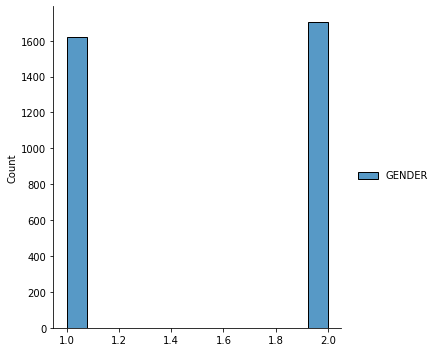

In [ ]:
import seaborn as sns

sns.displot(df.loc[:, ['GENDER']])

First we visualise the distribution of sex in our dataset and we can see from the result, it's about 50/50. Each sex has around 1600 lines of data.

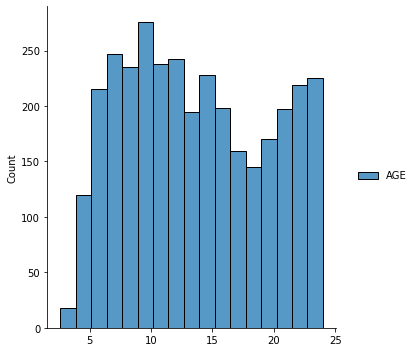

In [ ]:
sns.displot(df.loc[:, ['AGE']])

As the age distribution, we can see the oldest are less than 25, youngest are around 2 years old. All ages, except around 2 years old, have more than 100 data.

In [ ]:
from PIL import Image

def isNaN(string):
    return string != string

def img_process(data):

  path = '/content/drive/MyDrive/orig'
  data_combined = []
  count = 0

  for line in data.values:
    if line[0] == 1:
      sex = np.full((30, 40, 3), 0)
    else:
      sex = np.full((30, 40, 3), 255)
    if not isNaN(line[1]):
      I1 = Image.open(path + '/I1/' + line[1])
      I1 = I1.resize((40, 30))
      I1 = np.array(I1)
    else:
      I1 = np.full((30, 40, 3), -255)
    if not isNaN(line[2]):
      I2 = Image.open(path + '/I2/' + line[2])
      I2 = I2.resize((40, 30))
      I2 = np.array(I2)
    else:
      I2 = np.full((30, 40, 3), -255)
    if not isNaN(line[3]):
      C = Image.open(path + '/C1/' + line[3])
      C = C.resize((40, 30))
      C = np.array(C)
    else:
      C = np.full((30, 40, 3), -255)
    if not isNaN(line[4]):
      PM1 = Image.open(path + '/PM1/' + line[4])
      PM1 = PM1.resize((40, 30))
      PM1 = np.array(PM1)
    else:
      PM1 = np.full((30, 40, 3), -255)
    if not isNaN(line[5]):
      PM2 = Image.open(path + '/PM2/' + line[5])
      PM2 = PM2.resize((40, 30))
      PM2 = np.array(PM2)
    else:
      PM2 = np.full((30, 40, 3), -255)
    if not isNaN(line[6]):
      M1 = Image.open(path + '/M1/' + line[6])
      M1 = M1.resize((40, 30))
      M1 = np.array(M1)
    else:
      M1 = np.full((30, 40, 3), -255)
    if not isNaN(line[7]):
      M2 = Image.open(path + '/M2/' + line[7])
      M2 = M2.resize((40, 30))
      M2 = np.array(M2)
    else:
      M2 = np.full((30, 40, 3), -255)
    if not isNaN(line[8]):
      T_38 = Image.open(path + '/38/' + line[8])
      T_38 = T_38.resize((40, 30))
      T_38 = np.array(T_38)
    else:
      T_38 = np.full((30, 40, 3), -255)
    if not isNaN(line[9]):
      T_18 = Image.open(path + '/18/' + line[9])
      T_18 = T_18.resize((40, 30))
      T_18 = np.array(T_18)
    else:
      T_18 = np.full((30, 40, 3), -255)
    if not isNaN(line[10]):
      T_28 = Image.open(path + '/28/' + line[10])
      T_28 = T_28.resize((40, 30))
      T_28 = np.array(T_28)
    else:
      T_28 = np.full((30, 40, 3), -255)
    if not isNaN(line[11]):
      T_48 = Image.open(path + '/48/' + line[11])
      T_48 = T_48.resize((40, 30))
      T_48 = np.array(T_48)
    else:
      T_48 = np.full((30, 40, 3), -255)
    combined_1 = np.concatenate((sex, I1, I2, C), axis=0)
    combined_2 = np.concatenate((PM1, PM2, M1, M2), axis=0)
    combined_3 = np.concatenate((T_38, T_18, T_28, T_48), axis=0)
    img_combined = np.concatenate((combined_1, combined_2, combined_3), axis=1)
    plt.imshow(img_combined, interpolation='nearest')
    plt.show()
    img_combined = img_combined / 255
    data_combined.append(img_combined)
    count += 1
    print(count)
    break

  data_combined = np.array(data_combined)
  print(data_combined.shape)
  return data_combined


In [ ]:
from sklearn.model_selection import train_test_split

# df1 = df.dropna()
# print(df1.shape)
df1 = df.sample(n=1000, axis=0)
x_train, x_test, y_train, y_test = train_test_split (df1.loc[:, ['GENDER','I1','I2','C','PM1','PM2','M1','M2','38','18','28','48']], df1.loc[:, ['AGE']], test_size=0.25)
y_train = y_train.values
y_test = y_test.values
x_train.head()
print(x_train.shape)
print(y_train.shape)

(750, 12)
(750, 1)


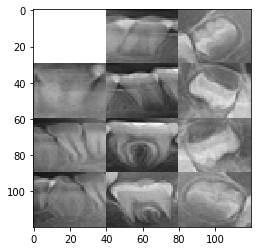

1
(1, 120, 120, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


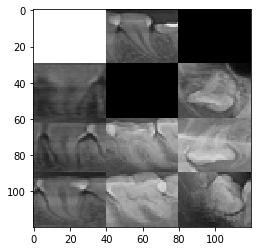

1
(1, 120, 120, 3)


In [ ]:
x_train = img_process(x_train)
x_test = img_process(x_test)

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.optimizers import Adam

#We start from general architecture of cnn, with 3 convoluted layers and one dense layer

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(120,120,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 64)        0

In [ ]:
adam = Adam(learning_rate=1e-4, decay=1e-6)
model.compile(optimizer=adam, loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
24/24 [==============================] - 10s 154ms/step - loss: 418.6794 - val_loss: 140.9817
Epoch 2/100
24/24 [==============================] - 3s 118ms/step - loss: 88.1495 - val_loss: 114.9918
Epoch 3/100
24/24 [==============================] - 3s 118ms/step - loss: 17.0787 - val_loss: 69.4304
Epoch 4/100
24/24 [==============================] - 3s 122ms/step - loss: 12.0761 - val_loss: 39.3001
Epoch 5/100
24/24 [==============================] - 3s 118ms/step - loss: 10.4807 - val_loss: 29.4510
Epoch 6/100
24/24 [==============================] - 3s 119ms/step - loss: 8.8047 - val_loss: 26.7981
Epoch 7/100
24/24 [==============================] - 3s 118ms/step - loss: 7.7024 - val_loss: 26.1169
Epoch 8/100
24/24 [==============================] - 3s 118ms/step - loss: 7.0281 - val_loss: 29.0419
Epoch 9/100
24/24 [==============================] - 3s 118ms/step - loss: 6.3480 - val_loss: 25.1013
Epoch 10/100
24/24 [==============================] - 3s 119ms/step - los

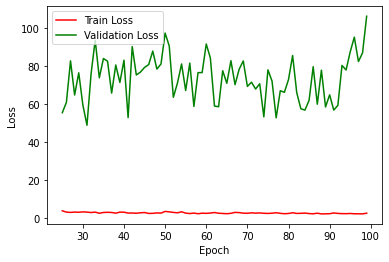

In [ ]:
df_results = pd.DataFrame.from_dict(history.history)
df_results = df_results.iloc[25:,]
plt.plot(df_results['loss'], color='red', label=('Train Loss'))
plt.plot(df_results['val_loss'], color='green', label=('Validation Loss'))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.optimizers import Adam

#Then we try to add more convoluted layers and more dense layers to get more information 
#(https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7)
#And the number of weights of first dense layer is much less than the flatten layer, so we increased the number and put one more dense layer to get more information

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 32)      9

In [ ]:
adam = Adam(learning_rate=1e-4, decay=1e-6)
model.compile(optimizer=adam, loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
24/24 [==============================] - 11s 321ms/step - loss: 63.8769 - val_loss: 82.3007
Epoch 2/100
24/24 [==============================] - 6s 268ms/step - loss: 16.8718 - val_loss: 50.8391
Epoch 3/100
24/24 [==============================] - 6s 269ms/step - loss: 16.4096 - val_loss: 52.0791
Epoch 4/100
24/24 [==============================] - 6s 269ms/step - loss: 12.6152 - val_loss: 51.3378
Epoch 5/100
24/24 [==============================] - 6s 269ms/step - loss: 14.0254 - val_loss: 120.0583
Epoch 6/100
24/24 [==============================] - 6s 269ms/step - loss: 10.4412 - val_loss: 141.0830
Epoch 7/100
24/24 [==============================] - 6s 270ms/step - loss: 9.7510 - val_loss: 148.1628
Epoch 8/100
24/24 [==============================] - 6s 270ms/step - loss: 8.5770 - val_loss: 129.7519
Epoch 9/100
24/24 [==============================] - 6s 270ms/step - loss: 8.9476 - val_loss: 188.5122
Epoch 10/100
24/24 [==============================] - 6s 271ms/step - 

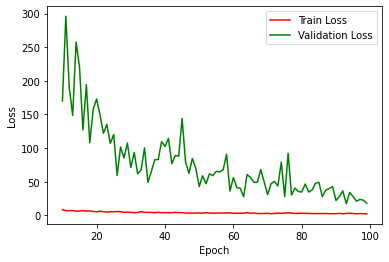

In [ ]:
df_results = pd.DataFrame.from_dict(history.history)
df_results = df_results.iloc[10:,]
plt.plot(df_results['loss'], color='red', label=('Train Loss'))
plt.plot(df_results['val_loss'], color='green', label=('Validation Loss'))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
from keras.optimizers import Adam

#But at some point the loss is not getting down, as the suggest of this website
#https://stats.stackexchange.com/questions/335836/cnn-architectures-for-regression
#Then we reduce the number of layers
#and also, we changed the activation function in dense layer to tanh
#https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 32)       

In [ ]:
adam = Adam(learning_rate=1e-4, decay=1e-6)
model.compile(optimizer=adam, loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
24/24 [==============================] - 7s 230ms/step - loss: 58.0296 - val_loss: 66.3796
Epoch 2/100
24/24 [==============================] - 5s 215ms/step - loss: 15.0020 - val_loss: 62.9684
Epoch 3/100
24/24 [==============================] - 5s 215ms/step - loss: 9.7347 - val_loss: 29.7876
Epoch 4/100
24/24 [==============================] - 5s 217ms/step - loss: 7.0617 - val_loss: 28.9184
Epoch 5/100
24/24 [==============================] - 5s 220ms/step - loss: 5.3473 - val_loss: 29.5214
Epoch 6/100
24/24 [==============================] - 5s 217ms/step - loss: 5.2022 - val_loss: 28.0266
Epoch 7/100
24/24 [==============================] - 5s 217ms/step - loss: 4.4241 - val_loss: 27.5111
Epoch 8/100
24/24 [==============================] - 5s 219ms/step - loss: 4.0093 - val_loss: 27.1689
Epoch 9/100
24/24 [==============================] - 5s 220ms/step - loss: 4.3535 - val_loss: 26.3429
Epoch 10/100
24/24 [==============================] - 5s 217ms/step - loss: 3.47

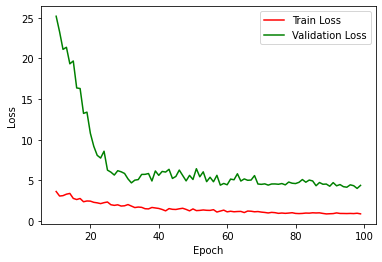

In [ ]:
df_results = pd.DataFrame.from_dict(history.history)
df_results = df_results.iloc[10:,]
plt.plot(df_results['loss'], color='red', label=('Train Loss'))
plt.plot(df_results['val_loss'], color='green', label=('Validation Loss'))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Reynaldo


In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from PIL import Image

def train_test_model(model, optimizer, x_train, y_train, validation_data, epochs = 100, batch_size = 16):
  model.compile(optimizer=optimizer, loss='mean_squared_error')
  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
  df_results = pd.DataFrame.from_dict(history.history)
  df_results = df_results.iloc[1:,]
  plt.plot(df_results['loss'], color='red', label=('Train Loss'))
  plt.plot(df_results['val_loss'], color='green', label=('Validation Loss'))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

def model_creation(nb_conv_layers, filters, kernel_size, conv_activation, pool_size, dropout_amount, nb_dense_layers, starting_dense_neurons, dense_activation, input_shape):
  model = Sequential()
  for i in range(nb_conv_layers):
    print('Adding CONV layer')
    if i == 0:
      model.add(Conv2D(filters=filters[i], kernel_size=kernel_size, padding='same', activation=conv_activation, input_shape=input_shape))
    else:
      model.add(Conv2D(filters=filters[i], kernel_size=kernel_size, padding='same', activation=conv_activation)) 
      model.add(MaxPool2D(pool_size=pool_size))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_amount))
  
  model.add(Flatten())
  print('Flattening')

  for i in range(nb_dense_layers):
    print('Adding DENSE layer')
    model.add(Dense(starting_dense_neurons, activation=dense_activation))
    model.add(Dropout(dropout_amount))
    print('...')
    starting_dense_neurons /= 4
    starting_dense_neurons = round(starting_dense_neurons)

  model.add(Dense(1, activation='linear'))
  model.summary()
  return model

def img_process_only_important(data):

  path = '/content/drive/MyDrive/orig'
  data_combined = []
  count = 0

  for line in data.values:
    if line[0] == 1:
      sex = np.full((30, 40, 3), 0)
    else:
      sex = np.full((30, 40, 3), 255)
    if not isNaN(line[1]):
      I1 = Image.open(path + '/I1/' + line[1])
      I1 = I1.resize((40, 30))
      I1 = np.array(I1)
    else:
      I1 = np.full((30, 40, 3), -1)
    if not isNaN(line[2]):
      I2 = Image.open(path + '/I2/' + line[2])
      I2 = I2.resize((40, 30))
      I2 = np.array(I2)
    else:
      I2 = np.full((30, 40, 3), -1)
    if not isNaN(line[6]):
      M1 = Image.open(path + '/M1/' + line[6])
      M1 = M1.resize((40, 30))
      M1 = np.array(M1)
    else:
      M1 = np.full((30, 40, 3), -1)
    if not isNaN(line[7]):
      M2 = Image.open(path + '/M2/' + line[7])
      M2 = M2.resize((40, 30))
      M2 = np.array(M2)
    else:
      M2 = np.full((30, 40, 3), -1)
    if not isNaN(line[8]):
      T_38 = Image.open(path + '/38/' + line[8])
      T_38 = T_38.resize((40, 30))
      T_38 = np.array(T_38)
    else:
      T_38 = np.full((30, 40, 3), -1)
    if not isNaN(line[9]):
      T_18 = Image.open(path + '/18/' + line[9])
      T_18 = T_18.resize((40, 30))
      T_18 = np.array(T_18)
    else:
      T_18 = np.full((30, 40, 3), -1)
    if not isNaN(line[10]):
      T_28 = Image.open(path + '/28/' + line[10])
      T_28 = T_28.resize((40, 30))
      T_28 = np.array(T_28)
    else:
      T_28 = np.full((30, 40, 3), -1)
    if not isNaN(line[11]):
      T_48 = Image.open(path + '/48/' + line[11])
      T_48 = T_48.resize((40, 30))
      T_48 = np.array(T_48)
    else:
      T_48 = np.full((30, 40, 3), -1)
    combined_1 = np.concatenate((sex, I1, I2), axis=0)
    combined_2 = np.concatenate((M1, M2, T_38), axis=0)
    combined_3 = np.concatenate((T_18, T_28, T_48), axis=0)
    img_combined = np.concatenate((combined_1, combined_2, combined_3), axis=1)
    # plt.imshow(img_combined, interpolation='nearest')
    # plt.show()
    img_combined = img_combined / 255
    data_combined.append(img_combined)
    count += 1
    print(count)

  data_combined = np.array(data_combined)
  print(data_combined.shape)
  return data_combined







In [ ]:
# Data 1
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/orig/data.csv', sep=';')
df.head()
print(df.shape)
df = df.sample(n=400, axis=0)

x_train, x_test, y_train, y_test = train_test_split (df.loc[:, ['GENDER','I1','I2','C','PM1','PM2','M1','M2','38','18','28','48']], df.loc[:, ['AGE']], test_size=0.25)
y_train = y_train.values
y_test = y_test.values
x_train.head()
print(x_train.shape)
print(y_train.shape)

# All teeth taken into account
x_train_processed = img_process(x_train)
x_test_processed = img_process(x_test)



(3327, 14)
(300, 12)
(300, 1)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
27

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_48 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 60, 60, 32)       

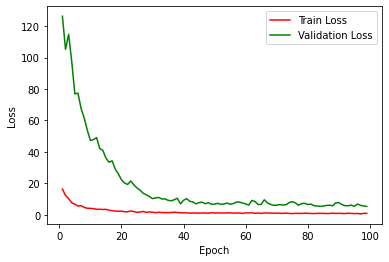

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()

adam = Adam(learning_rate=1e-4, decay=1e-6)

train_test_model(model, adam, x_train_processed, y_train, (x_test_processed, y_test))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


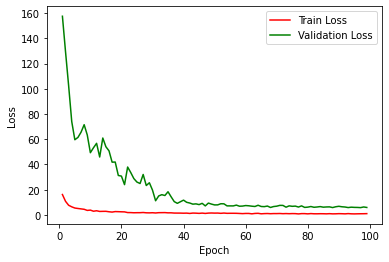

In [ ]:
# Data and model 2
# Only important teeth taken into account (sex since it matters on the size of the teeth https://www.hindawi.com/journals/tswj/2018/7641908/,
#, incisive since when they start they are like a saw, molars since the presence of amalgam may be there, wisdom teeth since they indicate age)
x_train_imp = img_process_only_important(x_train)
x_test_imp = img_process_only_important(x_test)

model_imp = Sequential()
model_imp.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(90,120,3)))
model_imp.add(LeakyReLU(alpha=0.1))
# model_imp.add(MaxPool2D(pool_size=(2,2)))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(MaxPool2D(pool_size=(2,2)))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(MaxPool2D(pool_size=(2,2)))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(MaxPool2D(pool_size=(2,2)))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Flatten())

model_imp.add(Dense(8192, activation='tanh'))
model_imp.add(Dropout(0.25))

model_imp.add(Dense(512, activation='tanh'))
model_imp.add(Dropout(0.25))

model_imp.add(Dense(1, activation='linear'))

model_imp.summary()

adam = Adam(learning_rate=1e-4, decay=1e-6)
train_test_model(model_imp, adam, x_train_imp, y_train, (x_test_imp, y_test))

Data is about the same, so we use all the data just in case (it's a bit better)

Testing optimizers 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_56 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 60, 60, 32)       

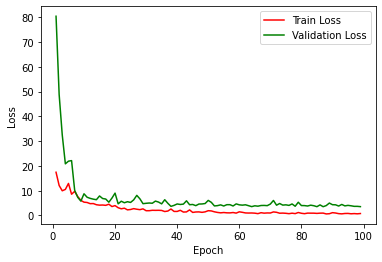

In [ ]:
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()

#SGD with momentum of 0.9
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD", clipnorm=1)
train_test_model(model, sgd, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_72 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 60, 60, 32)       

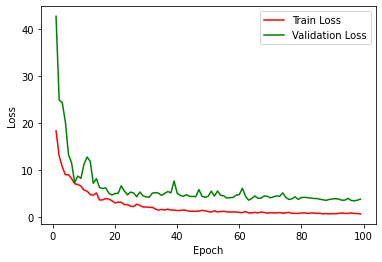

In [ ]:
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_54 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_57 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_80 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_55 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 60, 60, 32)      

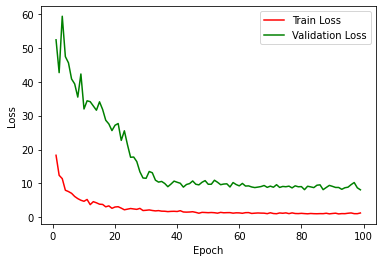

In [ ]:
from keras.optimizers import Adagrad
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()
#Adagrad
adag = Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad")
train_test_model(model, adag, x_train_processed, y_train, (x_test_processed, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)       

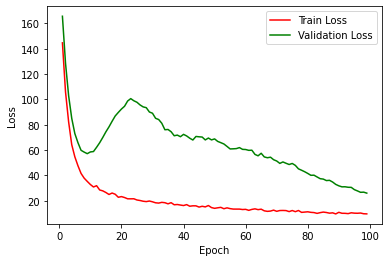

In [ ]:
from keras.optimizers import Adadelta
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()

#Adadelta with rho of 0.9
adad = Adadelta(
    learning_rate=0.001, rho=0.9, epsilon=1e-07, name="Adadelta")
train_test_model(model, adad, x_train_processed, y_train, (x_test_processed, y_test))

We get exploding gradients problem http://neuralnetworksanddeeplearning.com/chap5.html

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 32)       

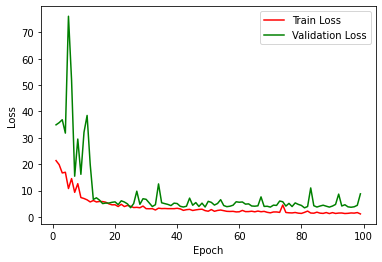

In [ ]:
from keras.optimizers import RMSprop
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()

#RMSprop with rho of 0.9
rms = RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",)
train_test_model(model, rms, x_train_processed, y_train, (x_test_processed, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 32)       

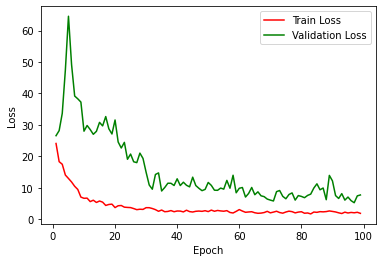

In [ ]:
from keras.optimizers import Adamax
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()

#Adamaw with learning rate 0.002, beta1 0.9, beta2 0.999 and epsilon 1e-07
adamax = Adamax(
    learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")
train_test_model(model,  adamax, x_train_processed, y_train, (x_test_processed, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 32)       

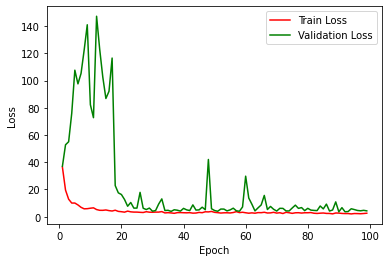

In [ ]:
from keras.optimizers import Nadam
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()

#Nadam
nadam = Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
train_test_model(model, nadam, x_train_processed, y_train, (x_test_processed, y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_32 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 32)       

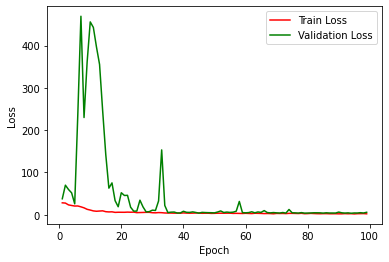

In [ ]:
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()

#Adam with asmgrad
asmgrad = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam"
    )
train_test_model(model, asmgrad, x_train_processed, y_train, (x_test_processed, y_test))

The best one is SGD with momentum of 0.9 and Nesterov accelerated gradient. Now we try changing the dropout amount. As [this paper](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf) and [this paper](https://proceedings.neurips.cc/paper/2013/file/71f6278d140af599e06ad9bf1ba03cb0-Paper.pdf) suggest, 0.5 dropout is the best. However we will try with 0.25 - 0.35 - 0.45 - 0.5 - 0.55 - 0.65 and 0.75  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)       

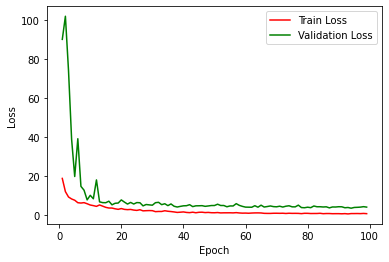

In [ ]:
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
#0.25
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 32)       

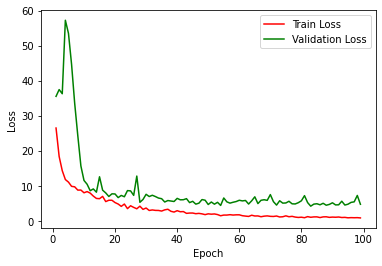

In [ ]:
#0.35
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.35))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.35))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 32)       

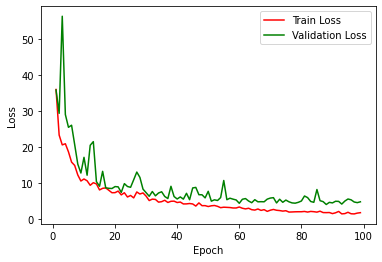

In [ ]:
#0.45
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.45))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.45))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 32)       

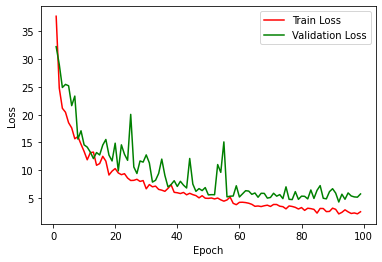

In [ ]:
#0.5
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_32 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 32)       

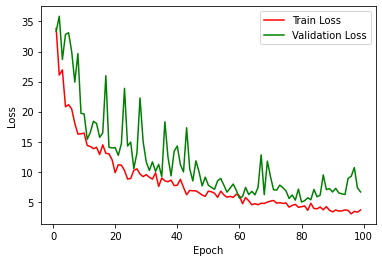

In [ ]:
#0.55
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.55))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.55))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 60, 60, 32)       

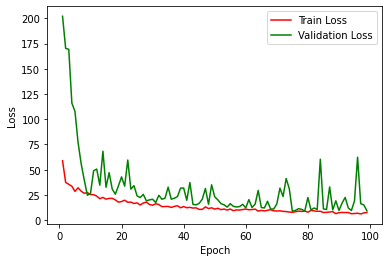

In [ ]:
#0.65
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.65))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.65))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_48 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 60, 60, 32)       

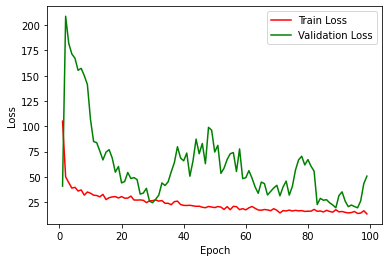

In [ ]:
#0.75
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.75))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.75))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Best is to take 5 since the loss is still 2 which is low and we assure is not overfitted

We now test kernel size and following [this paper's](https://www.osti.gov/servlets/purl/1631245#:~:text=Typically%2C%20convolutional%20layer%20kernel%20sizes,CNN%20found%20kernel%20sizes%20of) recommendations we will test one, three, five and ten kernel sizes.

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 120, 120, 32)      128       
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_64 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 120, 120, 32)      1056      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 60, 60, 32)       

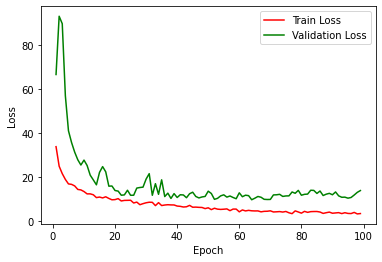

In [ ]:
#1x1
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1, 1), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_56 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 60, 60, 32)       

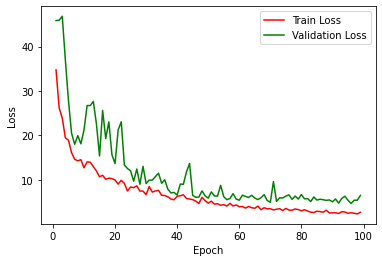

In [ ]:
#3x3
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 120, 120, 32)      2432      
_________________________________________________________________
leaky_re_lu_54 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_54 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_72 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 120, 120, 32)      25632     
_________________________________________________________________
leaky_re_lu_55 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 60, 60, 32)      

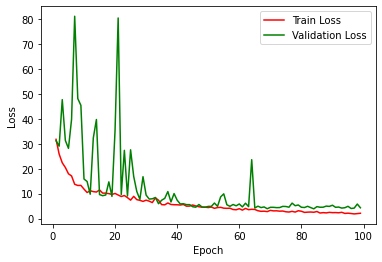

In [ ]:
#5x5
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 120, 120, 32)      7808      
_________________________________________________________________
leaky_re_lu_60 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_60 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_80 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 120, 120, 32)      82976     
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 60, 60, 32)      

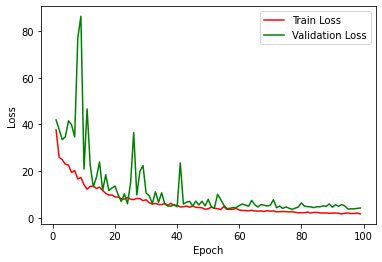

In [ ]:
#9x9
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(9,9), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

model.summary()
#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


As suggested, 9x9 is better